(ref:lec3:ex2)=
# Exercise 3.2


Sketch the Bode plot of the following systems:

1. $G(s) = \frac{100(s + 8)}{s^2(s + 4)(s + 5)(s + 10)}$

2. $G(s) = \frac{0.4}{(s + 0.1)(s^2 + 0.4s + 4)(s + 0.5)}$

---

## Solution

### System 1

We first need to compute the poles and zeros of the system:

**Poles**
- $s = 0$ (twice)
- $s = -4$
- $s = -5$
- $s = -10$

**Zeros**
- $s = -8$

Then, we sort poles and zeros by increasing frequencies, and we apply the rules to sketch asymptotic bode diagrams

| Frequency         |       What happens to the modulus plot             |       What happens to the phase plot       |   
|-------------------|----------------------------------------------------|--------------------------------------------|
| $0$ rad/s  (pole) | The initial slope is $-2$ ($-40 \text{ dB/dec}$)   | The initial phase is $-180^\circ$          |
| $4$ rad/s  (pole) | The slope decreases from $-2$ to $-3$              | The phase decreases by $90^\circ$          |
| $5$ rad/s  (pole) | The slope decreases from $-3$ to $-4$              | The phase decreases by $90^\circ$          |
| $8$ rad/s  (zero) | The slope increases from $-4$ to $-3$              | The phase increases by $90^\circ$          |
| $10$ rad/s  (pole)| The slope decreases from $-3$ to $-4$              | The phase decreases by $90^\circ$          |





Because of the poles in the origin, we can't compute the static gain which would be needed to start sketching the modulus at low frequencies.

The solution here is to evaluate $\lvert G(i \omega) \lvert_{\text{dB}}$ at a sufficiently small frequency $\omega$. A **general guideline** is to evaluate such a modulus **one or two decades before the slowest pole/zero** (save for the ones in $s=0$, of course).

In our case, the slowest pole (save for $s=0$) is in $4$ rad/s, hence we compute $\lvert G(i 0.04) \lvert_{\text{dB}}$.

$$\lvert G(i 0.04) \lvert = \frac{100 \cdot \lvert i 0.04 + 8 \lvert}{\lvert i 0.04 \lvert^2 \cdot \lvert i 0.04 + 4 \lvert \cdot \lvert i 0.04 + 5 \lvert \cdot \lvert i 0.04 + 10 \lvert} 

While it might seem a lot of work to compute this modulus we can note that, thanks our choice $\omega = 0.04$, within every modulus operation the imaginary part is always negligible compared to the real part (save for the poles in $s=0$, where of course the real part is null). As an example, $\lvert i 0.04 + 5 \lvert \simeq \lvert 5 \lvert = 5$. The computation therefore simplifies to

$\lvert G(i 0.04) \lvert \simeq \frac{100 \cdot 8}{0.04^2 \cdot 4 \cdot 5 \cdot 10} = 2500 \to 68 \text{dB}$

We can now sketch the Bode plot 🥳  Reported below is the solution, sketched with the script [asymptotic_bode](https://raw.githubusercontent.com/bonassifabio/1RT485/refs/heads/main/).

In [1]:
% Check if we are running in Octave or MATLAB
if exist('OCTAVE_VERSION', 'builtin')
    pkg load control; warning('off', 'all');
    if isempty(getenv('BINDER_SERVICE_HOST')); t = 'notebook'; else; t = 'plotly'; end
    graphics_toolkit(t);
end

if ~exist('asymptotic_bode.m', 'file')
    websave('asymptotic_bode.m', 'https://raw.githubusercontent.com/bonassifabio/1RT485/refs/heads/main/book/res/asymptotic_bode.m');
end

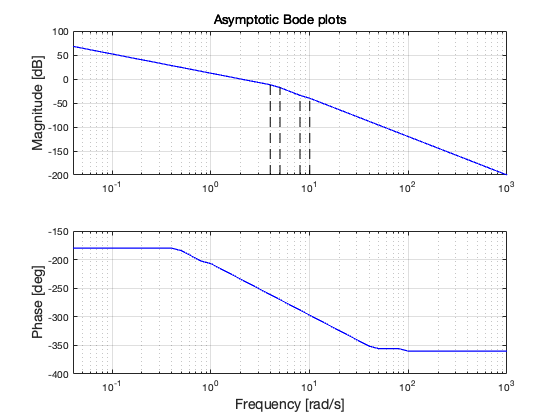

In [2]:
% Define the transfer function
s = tf('s');
G = 100 * (s + 8) / (s^2 * (s + 4) * (s + 5) * (s + 10));
asymptotic_bode(G)

### System 2

We start by computing the poles, zeros, and static gain of the system $G(s) = \frac{0.4}{(s + 0.1)(s^2 + 0.4s + 4)(s + 0.5)}$

**Poles**
- $s = -0.1$
- $s = -0.5$
- $s \simeq -0.2 \pm i 2$ (complex conjugate poles with natural frequency $\omega_n = \sqrt{0.2^2 + 2^2} \simeq 2$ rad/s)

**Zeros**
- None

**Static gain**
- $G(0) = 2 \to 6 \text{ dB}$


We can then sketch the asymptotic Bode plot by applying the rules


| Frequency                   |       What happens to the modulus plot                         |       What happens to the phase plot                    |   
|-----------------------------|----------------------------------------------------------------|---------------------------------------------------------|
| $0$ rad/s                   | The magnitude plot starts flat (slope is $0$) at $6 \text{ dB}$ | The initial phase is $0^\circ$                          |
| $0.1$ rad/s (pole)          | The slope decreases from $0$ to $-1$                           | The phase decreases by $90^\circ$                       |
| $0.4$ rad/s (pole)          | The slope decreases from $-1$ to $-2$                          | The phase decreases by $90^\circ$                       |
| $2$ rad/s (complex poles)   | The slope decreases from $-2$ to $-4$                          | The phase decreases by $180^\circ$                      |

We can now sketch the Bode plot!

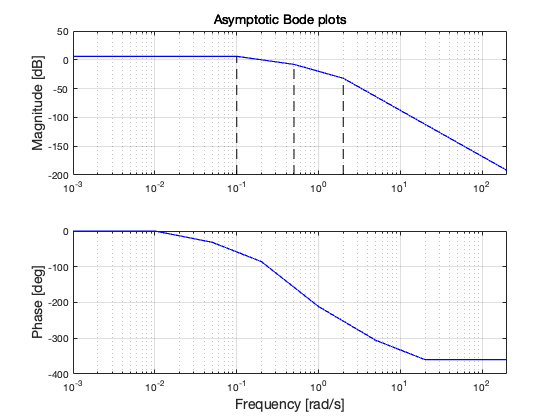

In [5]:
G = 0.4 / ((s + 0.1) * (s^2 + 0.4 * s + 4) * (s + 0.5));
asymptotic_bode(G)